In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 55.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

In [3]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

##**Discrétisation à largeur égale avec pandas**
  + Nous devons d'abord déterminer les bords ou les limites de l'intervalle.

In [5]:
 # capturons la plage de valeurs de la variable LSTAT

lstat_range = X_train['LSTAT'].max() - X_train['LSTAT'].min()

lstat_range

35.25

In [6]:
# divisons la plage en 10 tranches de largeur égale

lstat_range / 10

3.525

In [7]:
# maintenant, capturons les limites inférieures et supérieures

min_value = int(np.floor( X_train['LSTAT'].min()))
max_value = int(np.ceil( X_train['LSTAT'].max()))

# arrondissons la largeur de la case
inter_width = int(lstat_range / 10)
min_value, max_value, inter_width

(1, 37, 3)

In [8]:
# capturons les limites de l'intervalle, afin de les passer à la fonction pandas cut()
# pour générer les intervalles

intervals = [i for i in range(min_value, max_value+inter_width, inter_width)]

intervals

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [9]:
# discretise LSTAT

X_train['lstat_disc'] = pd.cut(x=X_train['LSTAT'],
                               bins=intervals,
                               include_lowest=True)


print(X_train[['LSTAT', 'lstat_disc']].head(10))

     LSTAT    lstat_disc
141  34.41  (34.0, 37.0]
272   7.73   (7.0, 10.0]
135  16.96  (16.0, 19.0]
298   4.97    (4.0, 7.0]
122  17.93  (16.0, 19.0]
22   18.72  (16.0, 19.0]
68   13.09  (13.0, 16.0]
20   21.02  (19.0, 22.0]
437  26.45  (25.0, 28.0]
14   10.26  (10.0, 13.0]


In [10]:
# let's check the number of observations per bin

X_train['lstat_disc'].value_counts()

(4.0, 7.0]      67
(7.0, 10.0]     63
(10.0, 13.0]    49
(16.0, 19.0]    45
(13.0, 16.0]    44
(0.999, 4.0]    28
(19.0, 22.0]    21
(22.0, 25.0]    17
(28.0, 31.0]     9
(25.0, 28.0]     7
(34.0, 37.0]     4
(31.0, 34.0]     0
Name: lstat_disc, dtype: int64

Text(0, 0.5, 'Number of observations per bin')

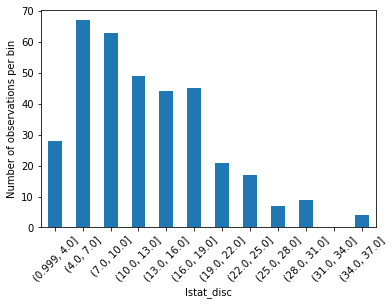

In [11]:
# let's plot the number of observations per bin

X_train.groupby('lstat_disc')['LSTAT'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

In [12]:
# let's discretise the variables in the test set

X_test['lstat_disc'] = pd.cut(x=X_test['LSTAT'],
                              bins=intervals,
                              include_lowest=True)

X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_disc
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,"(7.0, 10.0]"
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,"(7.0, 10.0]"
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,"(10.0, 13.0]"
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,"(19.0, 22.0]"
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,"(10.0, 13.0]"


Text(0, 0.5, "Nombre d'observations par bin")

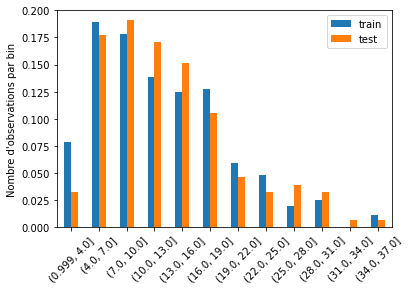

In [13]:
# Si les distributions des ensembles de test et de formation sont similaires,
# nous devons nous attendre à une proportion similaire d'observations dans les différents intervalles des ensembles de test et de formation.
# d'observations dans les différents intervalles des ensembles de test et de formation.
# Voyons cela ci-dessous

# Déterminer la proportion d'observations dans chaque bin
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)

# concaténation des vues agrégées
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# tracer
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel("Nombre d'observations par bin")

##**Equal-width discretization with Feature-engine**

In [14]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [15]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(bins=10, variables = ['LSTAT', 'DIS', 'RM'])

disc.fit(X_train)

EqualWidthDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

In [16]:
# the limits of the intervals are stored in the binner_dict_

disc.binner_dict_

{'DIS': [-inf,
  2.26943,
  3.36466,
  4.459890000000001,
  5.5551200000000005,
  6.65035,
  7.745580000000001,
  8.840810000000001,
  9.936040000000002,
  11.031270000000003,
  inf],
 'LSTAT': [-inf,
  5.255,
  8.78,
  12.305,
  15.83,
  19.355,
  22.88,
  26.405,
  29.93,
  33.455,
  inf],
 'RM': [-inf,
  4.0828999999999995,
  4.6048,
  5.1267,
  5.6486,
  6.1705,
  6.692399999999999,
  7.2143,
  7.736199999999999,
  8.258099999999999,
  inf]}

In [17]:
# transform train and test sets

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

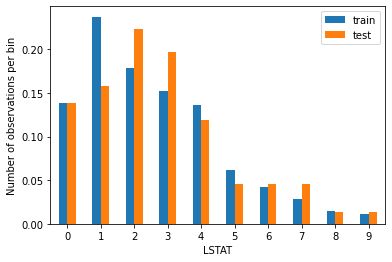

In [18]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT
# calculate proportion of observations per interval
t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

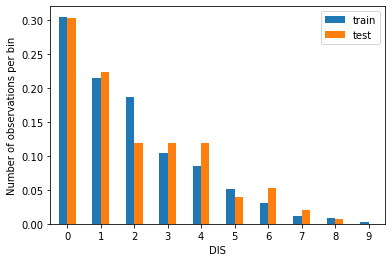

In [19]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

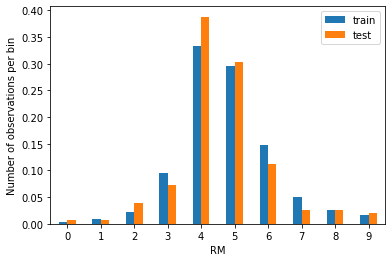

In [20]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

##**Equal-width discretization with Scikit-Learn**

In [21]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [22]:
# let's set up an equal-width discretizer into 10 intervals

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# let's fit the discretizer so it learns the interval limits
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [23]:
# the interval limits are stored in the bin_edges_attribute

disc.bin_edges_

array([array([ 1.73 ,  5.255,  8.78 , 12.305, 15.83 , 19.355, 22.88 , 26.405,
              29.93 , 33.455, 36.98 ])                                       ,
       array([ 1.1742 ,  2.26943,  3.36466,  4.45989,  5.55512,  6.65035,
               7.74558,  8.84081,  9.93604, 11.03127, 12.1265 ])         ,
       array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
              7.7362, 8.2581, 8.78  ])                                       ],
      dtype=object)

In [24]:
# same thing for test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

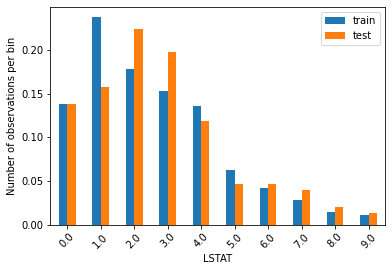

In [25]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

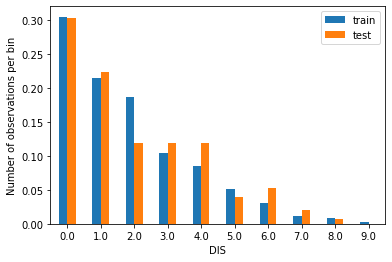

In [26]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

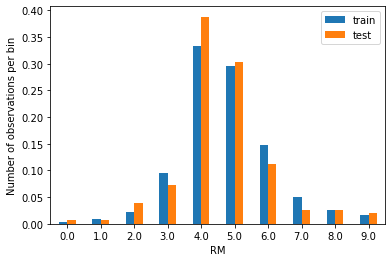

In [27]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

#**Recipe-2-Equal-frequency-discretisation**

In [28]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [29]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

###**Discrétisation à fréquence égale avec pandas**
  + Les limites de l'intervalle sont **les limites du quantile**. 
  + On peut les trouver avec **pandas qcut**.

In [31]:
# utilisons pandas qcut (quantile cut) et j'indique que
# nous voulons 10 bins.

# retbins = True indique que je souhaite capturer les limites
# des intervalles (afin que je puisse ensuite les utiliser pour découper le jeu de test)

X_train['lstat_disc'], intervals = pd.qcut(
    X_train['LSTAT'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

In [32]:
# let's visualize the interval edges

intervals

array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ])

In [33]:
# regardons le résultat : comparer la variable originale
# et la variable discrétisée

print(X_train[['LSTAT', 'lstat_disc']].head(10))

     LSTAT       lstat_disc
141  34.41  (22.453, 36.98]
272   7.73     (7.528, 9.5]
135  16.96  (15.565, 18.06]
298   4.97   (4.623, 6.202]
122  17.93  (15.565, 18.06]
22   18.72  (18.06, 22.453]
68   13.09   (11.16, 13.26]
20   21.02  (18.06, 22.453]
437  26.45  (22.453, 36.98]
14   10.26     (9.5, 11.16]


In [34]:
# vérifions le pourcentage d'observations par intervalle
# ils devraient être à peu près les mêmes

X_train['lstat_disc'].value_counts() / len(X_train)

(7.528, 9.5]       0.104520
(1.729, 4.623]     0.101695
(13.26, 15.565]    0.101695
(15.565, 18.06]    0.101695
(22.453, 36.98]    0.101695
(4.623, 6.202]     0.098870
(6.202, 7.528]     0.098870
(11.16, 13.26]     0.098870
(9.5, 11.16]       0.096045
(18.06, 22.453]    0.096045
Name: lstat_disc, dtype: float64

In [35]:
# et maintenant discrétisons LSTAT dans l'ensemble de test
# remarquez que nous utilisons maintenant pandas cut() au lieu de qcut() et
# passons les intervalles que nous avons déterminés pour l'ensemble de test.

X_test['lstat_disc'] = pd.cut(x = X_test['LSTAT'], bins=intervals)

In [36]:
# vérifions le pourcentage d'observations par intervalle
# devrait être à peu près le même

X_test['lstat_disc'].value_counts() / len(X_test)

(7.528, 9.5]       0.131579
(13.26, 15.565]    0.118421
(22.453, 36.98]    0.118421
(11.16, 13.26]     0.111842
(4.623, 6.202]     0.098684
(15.565, 18.06]    0.098684
(9.5, 11.16]       0.092105
(1.73, 4.623]      0.085526
(18.06, 22.453]    0.078947
(6.202, 7.528]     0.059211
Name: lstat_disc, dtype: float64

In [37]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_disc
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,"(22.453, 36.98]"
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,"(7.528, 9.5]"
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,"(15.565, 18.06]"
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,"(4.623, 6.202]"
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,"(15.565, 18.06]"


Text(0, 0.5, "Nombre d'observations par bin")

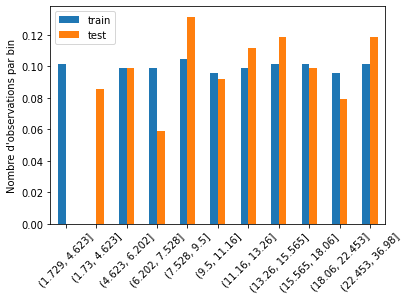

In [38]:
# Si les distributions des ensembles de test et de formation sont similaires,
# nous devons nous attendre à une proportion similaire d'observations dans les différents intervalles des ensembles de test et de formation.
# d'observations dans les différents intervalles des ensembles de test et de formation.
# Voyons cela ci-dessous

# Déterminer la proportion d'observations par intervalle
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)

# concaténation des vues agrégées
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# tracer
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel("Nombre d'observations par bin")



###**Equal-frequency discretization with Feature-engine**

In [39]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [40]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(q=10, variables = ['LSTAT', 'DIS', 'RM'])

disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

In [41]:
# in the binner dict, we can see the limits of the intervals
# for each variable

pd.DataFrame(disc.binner_dict_)

,LSTAT,DIS,RM
0,-inf,-inf,-inf
1,4.623,1.66132,5.5783
2,6.202,1.97930,5.8532
3,7.528,2.26121,5.9628
4,9.500,2.64774,6.1048
5,11.160,3.21570,6.2155
6,13.260,3.79650,6.3946
7,15.565,4.45352,6.5632
8,18.060,5.40702,6.7940
9,22.453,6.81470,7.1850


In [42]:
# transform train and test sets

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

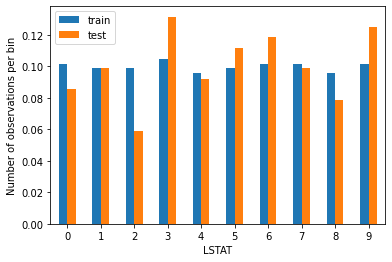

In [43]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

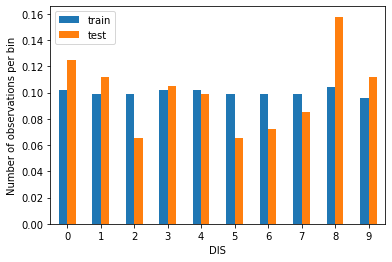

In [44]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

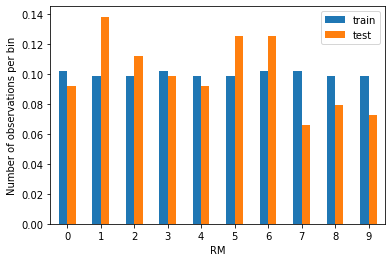

In [45]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

###**Equal-frequency discretization with Scikit-Learn**

In [46]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [47]:
# let's set up a discretizer based on quantiles to sort values in 10 bins

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

# fit the discretizer so that it learns the interval edges
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [48]:
# the interval edges are stored in a transformer attribute:

disc.bin_edges_

array([array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
              18.06 , 22.453, 36.98 ])                                       ,
       array([ 1.1742 ,  1.66132,  1.9793 ,  2.26121,  2.64774,  3.2157 ,
               3.7965 ,  4.45352,  5.40702,  6.8147 , 12.1265 ])         ,
       array([3.561 , 5.5783, 5.8532, 5.9628, 6.1048, 6.2155, 6.3946, 6.5632,
              6.794 , 7.185 , 8.78  ])                                       ],
      dtype=object)

In [49]:
# let's transform the train set, remember it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,0.0
1,3.0,6.0,6.0
2,7.0,2.0,5.0
3,1.0,9.0,5.0
4,7.0,2.0,2.0


In [50]:
# let's transform the train set, remember it returns a NumPy array
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

test_t.head()

,LSTAT,DIS,RM
0,2.0,7.0,5.0
1,4.0,0.0,5.0
2,4.0,5.0,5.0
3,8.0,1.0,0.0
4,5.0,7.0,5.0


Text(0, 0.5, 'Number of observations per bin')

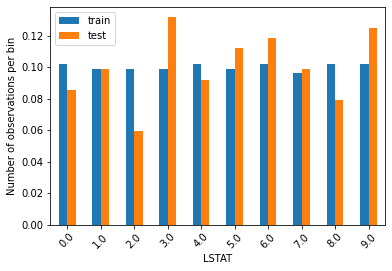

In [51]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

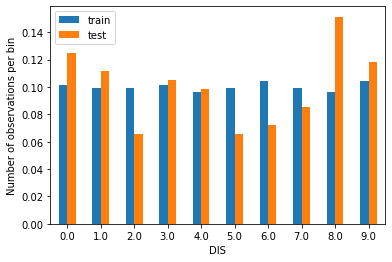

In [52]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

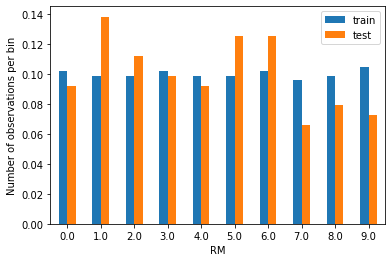

In [53]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

#**Recipe-3-Discretisation-plus-categorical-encoding**

In [54]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# from feature-engine
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

In [55]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

###**Equal-frequency discretization with Feature-engine**

In [57]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [58]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(
    q=10, variables=['LSTAT', 'DIS', 'RM'], return_object=True)

disc.fit(X_train)

EqualFrequencyDiscretiser(return_object=True, variables=['LSTAT', 'DIS', 'RM'])

In [59]:
# transform train and test

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'mean of survived')

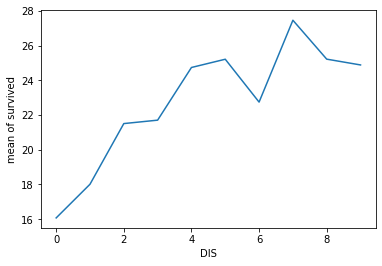

In [60]:
# let's explore if the bins have a linear relationship
# with the target: we see they don't

pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')

In [62]:
# let's order the bins

enc = OrdinalEncoder(encoding_method = 'ordered')

enc.fit(train_t, y_train)

OrdinalEncoder()

In [63]:
# we can fnd the list of encoded variables here
enc.variables

In [64]:
# we can find a list of the re-ordered bins mappings here
enc.encoder_dict_

{'DIS': {0: 0, 1: 1, 2: 2, 3: 3, 4: 5, 5: 7, 6: 4, 7: 9, 8: 8, 9: 6},
 'LSTAT': {0: 9, 1: 8, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1, 9: 0},
 'RM': {0: 0, 1: 1, 2: 2, 3: 3, 4: 6, 5: 4, 6: 5, 7: 7, 8: 8, 9: 9}}

In [65]:
# let's transformt the data sets
train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

Text(0, 0.5, 'mean of survived')

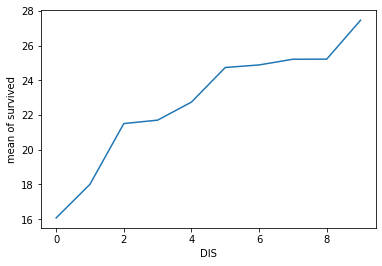

In [66]:
# let's explore the monotonic relationship between bins and target

pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')

###**Arbitrary-interval-discretisation**

In [67]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

In [68]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###**Discrétisation de largeur d'intervalle arbitraire avec pandas**
  + Nous devons d'abord déterminer les bords ou les limites de l'intervalle.

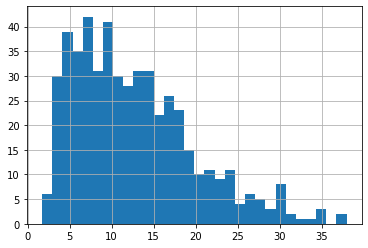

In [69]:
# let's plot a histogram to understand the value range of 
#the variable LSTAT

data['LSTAT'].hist(bins=30)

In [70]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 10, 20, 30, np.Inf]

# bin labels - we will use with pandas cut()
labels = ['0-10', '10-20', '20-30', '>30']

In [71]:
# discretize LSTAT

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
data['lstat_labels'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=labels, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
data['lstat_intervals'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(data[['LSTAT', 'lstat_labels', 'lstat_intervals']].head())

   LSTAT lstat_labels lstat_intervals
0   4.98         0-10  (-0.001, 10.0]
1   9.14         0-10  (-0.001, 10.0]
2   4.03         0-10  (-0.001, 10.0]
3   2.94         0-10  (-0.001, 10.0]
4   5.33         0-10  (-0.001, 10.0]


In [72]:
# let's check the number of observations per bin

data['lstat_intervals'].value_counts()

(-0.001, 10.0]    219
(10.0, 20.0]      213
(20.0, 30.0]       62
(30.0, inf]        12
Name: lstat_intervals, dtype: int64

###**Recipe-5-Discretisation-Kmeans**

In [73]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [74]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

###**K-means discretization with Scikit-Learn**

In [75]:
# set up a k-means discretizer
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

# fit the discretizer to the train set so that it learns the 
# interval boundaries
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [76]:
# we can inspect the bin boundaries here:

disc.bin_edges_

array([array([ 1.73      ,  5.45330009,  8.65519753, 12.03266667, 15.46755102,
              18.89709647, 22.15778075, 25.54037815, 28.75339286, 32.6525    ,
              36.98      ])                                                   ,
       array([ 1.1742    ,  2.26301884,  3.30153104,  4.48057886,  5.60712611,
               6.6482802 ,  7.56131797,  8.45406587,  9.7820881 , 11.37686667,
              12.1265    ])                                                   ,
       array([3.561     , 3.987125  , 4.73948864, 5.32155682, 5.77285276,
              6.14207435, 6.503811  , 6.91447956, 7.43717157, 8.1095049 ,
              8.78      ])                                               ],
      dtype=object)

In [77]:
# let's transform the train set, remember that it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

print(train_t.head())

   LSTAT  DIS   RM
0    9.0  0.0  2.0
1    1.0  2.0  6.0
2    4.0  0.0  5.0
3    0.0  6.0  5.0
4    4.0  0.0  4.0


In [78]:
# let's do the same for the test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

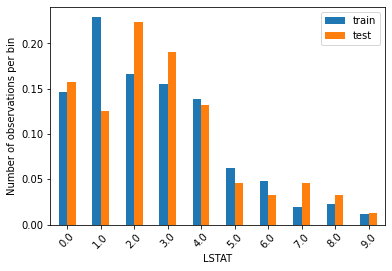

In [79]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

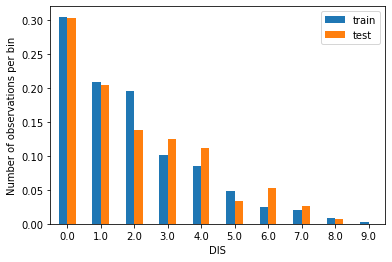

In [80]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

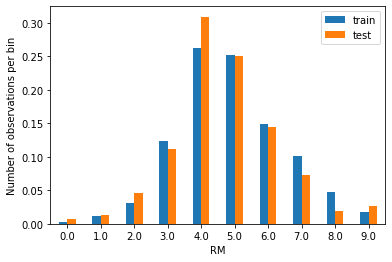

In [81]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

###**Recipe-6-Discretisation-with-decision-trees**

In [122]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [123]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

###**Discretization using Decision Trees**

In [124]:
# example: build Regression tree using LSTAT to predict MEDV

tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())

X_train[['LSTAT', 'lstat_tree']].head(10)

,LSTAT,lstat_tree
141,34.41,12.917241
272,7.73,27.153846
135,16.96,16.361818
298,4.97,32.042857
122,17.93,16.361818
22,18.72,16.361818
68,13.09,20.555000
20,21.02,12.917241
437,26.45,12.917241
14,10.26,20.555000


In [125]:
# let's explore how many end points (the bins) the tree created

X_train['lstat_tree'].nunique()

8

In [126]:
# let's explore which end points (the predictions) the tree created

X_train['lstat_tree'].unique()

array([12.91724138, 27.15384615, 16.36181818, 32.04285714, 20.555     ,
       34.88333333, 23.71388889, 41.80740741])

Text(0, 0.5, 'MEDV')

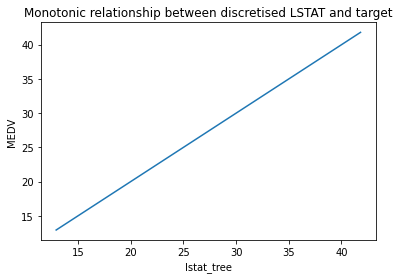

In [127]:
# monotonic relationship with target: train set

pd.concat([X_train, y_train], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

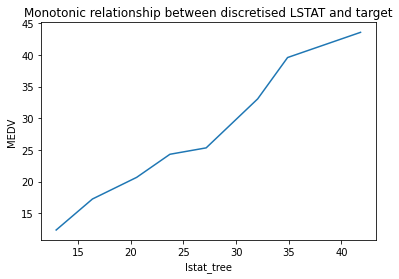

In [128]:
# monotonic relationship with target: test set

X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

pd.concat([X_test, y_test], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

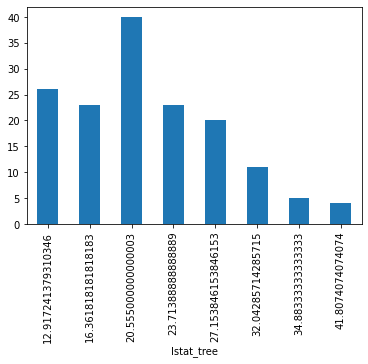

In [129]:
# plot number of observations per bin

X_test.groupby(['lstat_tree'])['LSTAT'].count().plot.bar()

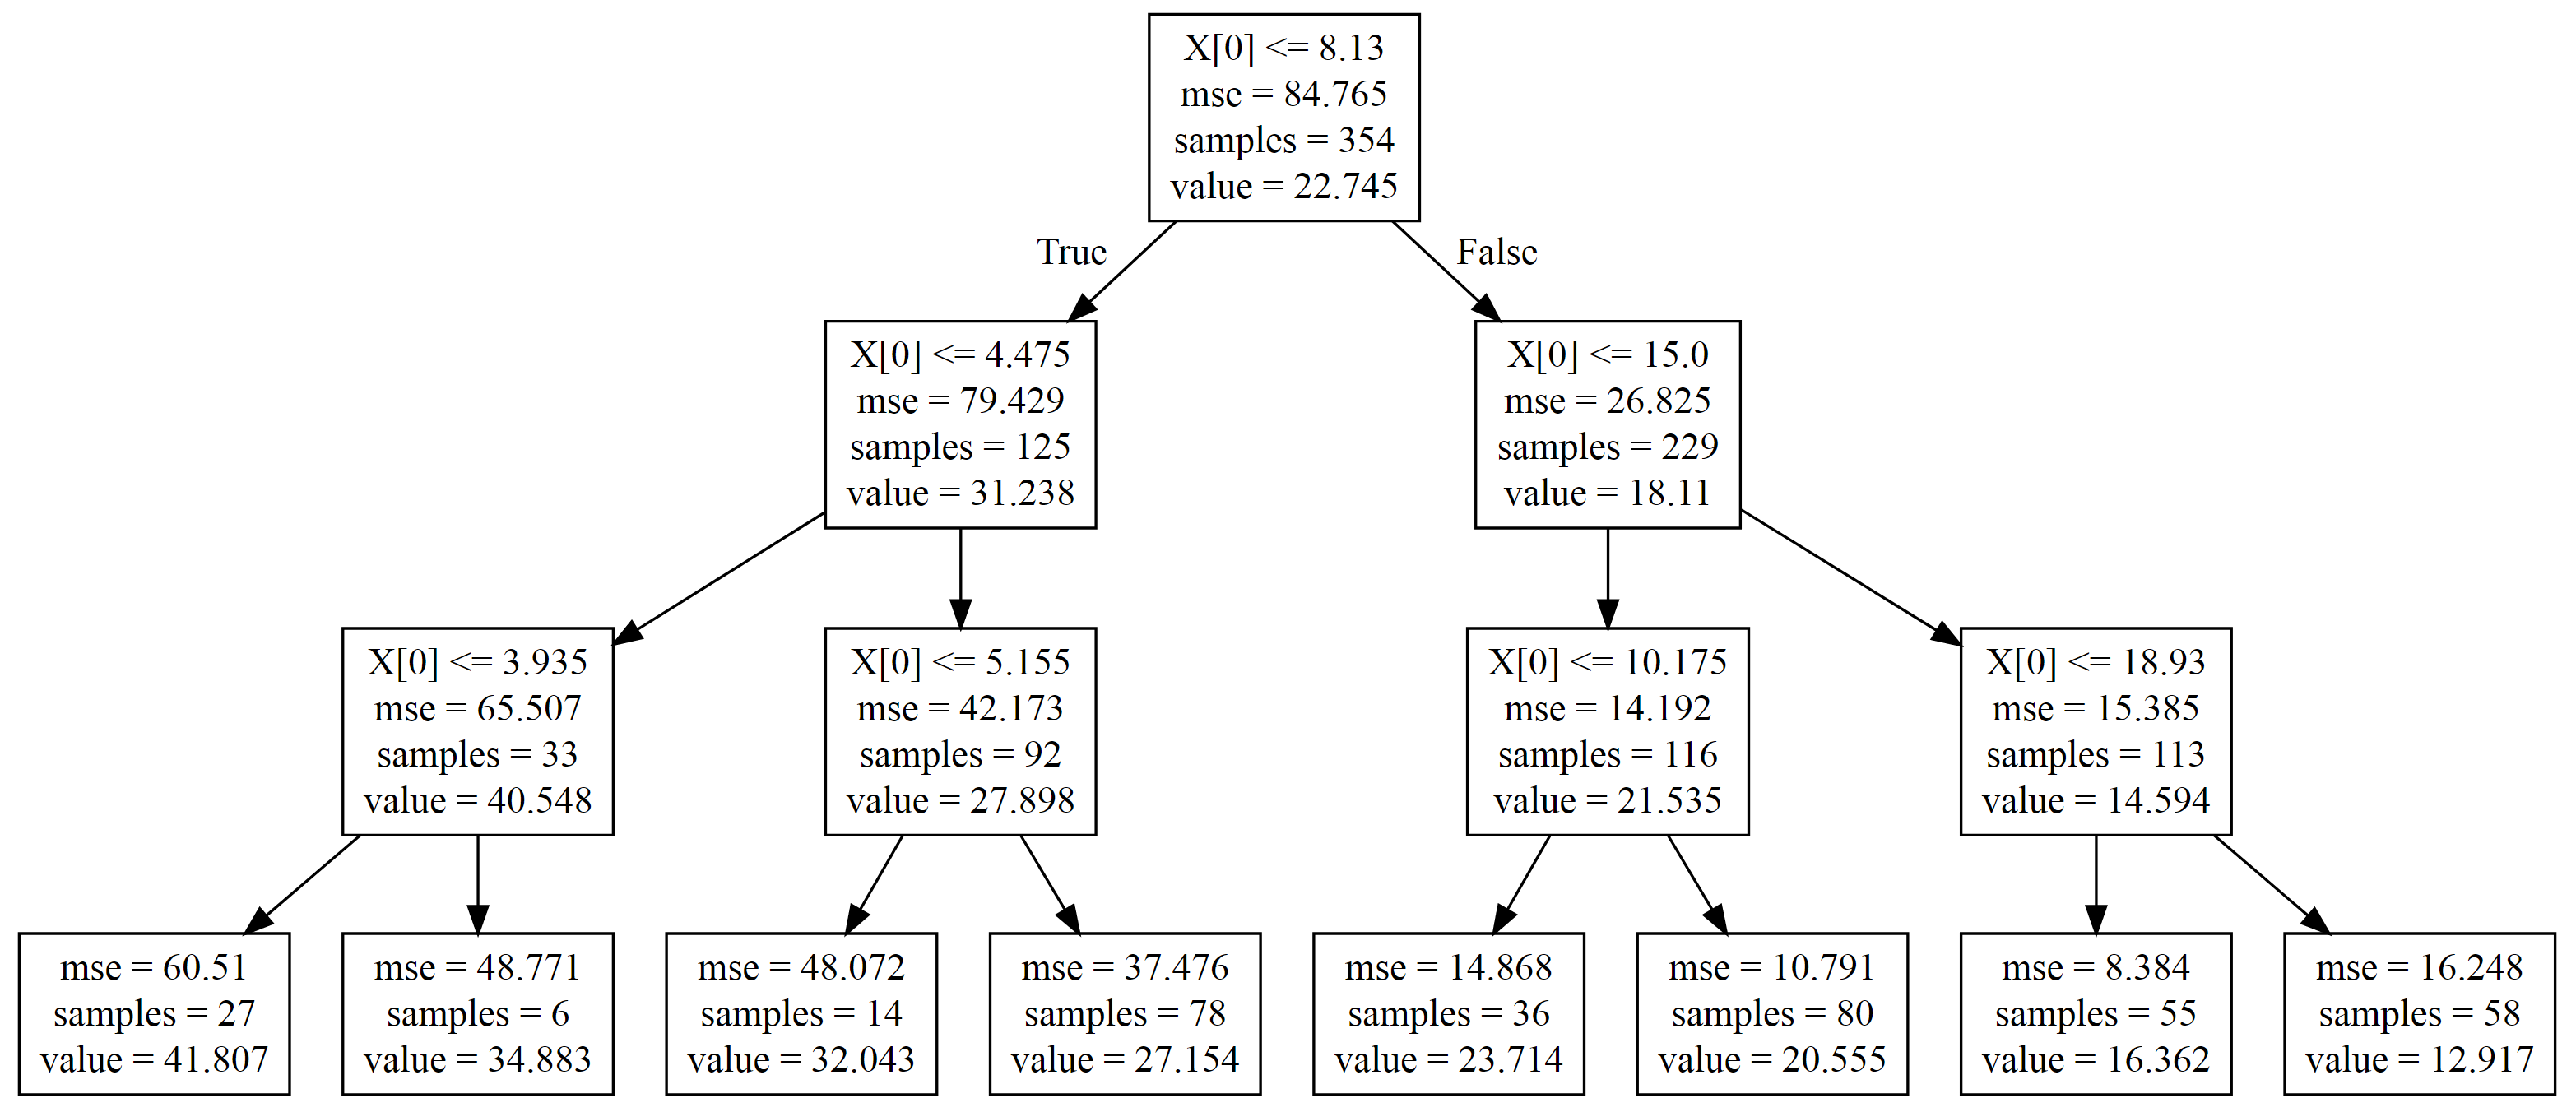

In [132]:
# we can go ahead and visualise the tree by saving the model to a file,

with open("/content/tree_model.txt", "w") as f:
  f = export_graphviz(tree_model, out_file=f)

# and opening that file in the below indicated link:

# go here to open the file: http://webgraphviz.com
# this is what you should see if you do what is described in the previous cell

# I saved the image you should retrieve in the server above into a png, and then load
# it here to smooth the demo

# the  plot indicates  the age cut-offs at each node, and also the number of samples at each node, and 
# the mse

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/content/tree_model.png"
Image(filename = PATH , width=1000, height=500)


###**Decision Tree with hyper-parameter tunning**

In [90]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [91]:
param_grid = {'max_depth': [1,2,3,4]}

In [92]:
# set up model within GridSearch with the parameters to optimize
# the metric to optimize and the fold cross-validation

tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          param_grid = param_grid)

In [98]:
 sorted(tree_model.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [101]:
tree_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator': DecisionTreeRegressor(random_state=0),
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 0,
 'estimator__splitter': 'best',
 'n_jobs': None,
 'param_grid': {'max_depth': [1, 2, 3, 4]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0}

In [93]:
# fit the grid - finds tree with optimal parameters for LSTAT

tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [106]:
# find predictions / discretize the variable

X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())
X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

###**Decision Tree discretization with Feature-engine**

In [108]:
from feature_engine.discretisation import DecisionTreeDiscretiser

In [109]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [110]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=10, scoring='neg_mean_squared_error',
                                   variables=['LSTAT', 'RM', 'DIS'],
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4]})

treeDisc.fit(X_train, y_train)

DecisionTreeDiscretiser(cv=10, param_grid={'max_depth': [1, 2, 3, 4]},
                        variables=['LSTAT', 'RM', 'DIS'])

In [111]:
# we can inspect the best parameters found for the tree for LSTAT

treeDisc.binner_dict_['LSTAT'].best_params_

{'max_depth': 3}

In [112]:
# and the parameters for each tree here:

treeDisc.binner_dict_

{'DIS': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error'),
 'LSTAT': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error'),
 'RM': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error')}

In [113]:
# the scores for the tree here
treeDisc.scores_dict_['LSTAT']

-23.515900045418213

In [114]:
# let's transform the data

train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

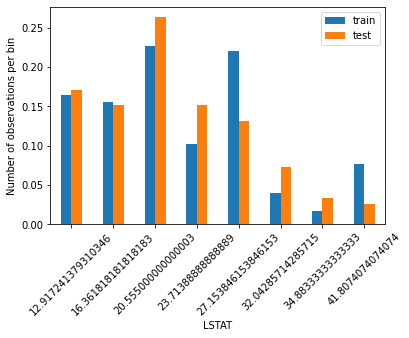

In [115]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'MEDV')

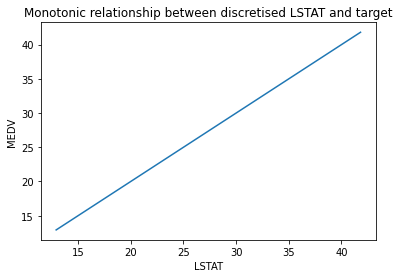

In [116]:
# let's explore the monotonic relationship
pd.concat([train_t, y_train], axis=1).groupby(['LSTAT'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

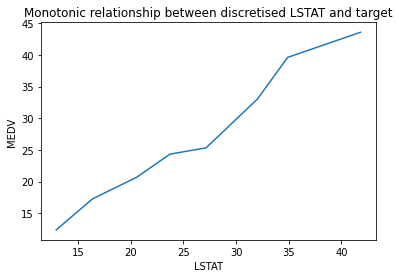

In [117]:
# let's explore the monotonic relationship
pd.concat([test_t, y_test], axis=1).groupby(['LSTAT'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'Number of observations per bin')

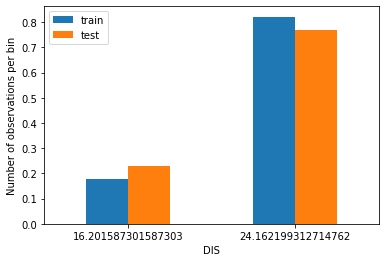

In [118]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

#LSTAT

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

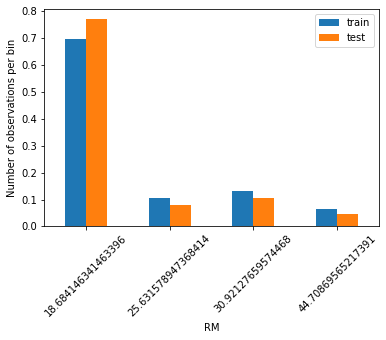

In [119]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

#RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')